{'PI1': (0, 0), 'PI2': (0, 15), 'PI3': (0, 30), 'PI4': (0, 45), 'PI5': (0, 60), 'PI6': (0, 75), 'PI7': (0, 90), 'PI8': (0, 105), 'PI9': (0, 120), 'PI10': (0, 135), 'PI11': (0, 150), 'PI12': (0, 165), 'PI13': (0, 180), 'HCSC3': (90, 0), 'HCSC1': (90, 20), 'HCSC6': (90, 40), 'HCSC4': (90, 60), 'HCSC5': (90, 80), 'HCSC9': (90, 100), 'HCSC10': (90, 120), 'HCSC2': (90, 140), 'HCSC8': (90, 160), 'HCSC7': (90, 180), 'CSC1': (180, 0), 'CSC2': (180, 36), 'CSC3': (180, 72), 'CSC4': (180, 108), 'CSC5': (180, 144), 'CSC6': (180, 180)}


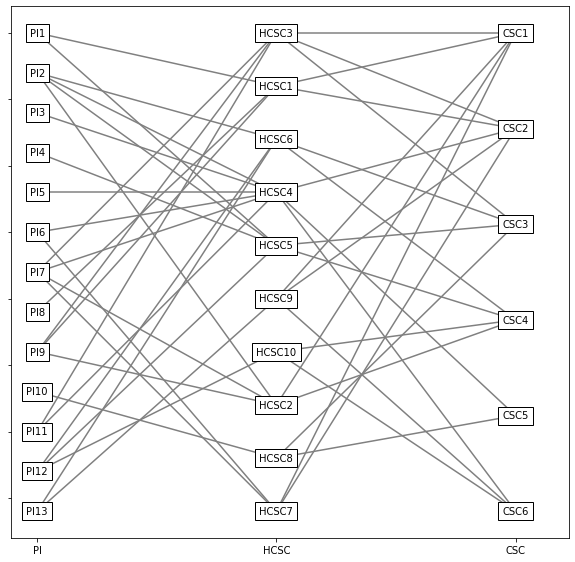

In [6]:
import itertools
import random
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def orientation(p, q, r):
    """Return orientation of triplet (p, q, r).
    The function returns following values:
    0 --> p, q, and r are colinear
    1 --> Clockwise
    2 --> Counterclockwise
    """
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0: return 0
    return 1 if val > 0 else 2

def do_intersect(p1,q1,p2,q2):
    """Return True if line segments 'p1q1' and 'p2q2' intersect."""
    if p1 == p2 or p1 == q2 or q1 == p2 or q1 == q2:
        return False  # Ignore intersections at the endpoints
    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)

    if o1 != o2 and o3 != o4:
        return True
    return False

def count_intersections(current_assignments, links):
    """Count total intersections for current label placements."""
    count = 0
    for i in range(len(links)):
        for j in range(i+1, len(links)):
            link1, link2 = links[i], links[j]
            p1, p2 = current_assignments[link1[0]], current_assignments[link1[1]]
            q1, q2 = current_assignments[link2[0]], current_assignments[link2[1]]

            if do_intersect(p1, p2, q1, q2):
                count += 1
    return count


def draw_labels_and_links(assignments, links):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Drawing labels
    for label, pos in assignments.items():
        ax.text(pos[0], pos[1], label, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black'))

    # Drawing links
    for link in links:
        start_pos = assignments[link[0]]
        end_pos = assignments[link[1]]
        line = mlines.Line2D([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], color='gray')
        ax.add_line(line)

    ax.set_xlim(-10, 200)
    ax.set_ylim(-10, max([pos[1] for pos in col3_posits]) + 10)
    ax.set_xticks([0, 90, 180])
    ax.set_xticklabels(['PI', 'HCSC', 'CSC'])
    ax.set_yticklabels([])
    ax.set_aspect('equal')
    plt.gca().invert_yaxis()  # Invert y axis to have 0 at the top
    plt.show()

nb_PI = 13
nb_HCSC = 10
nb_CSC = 6

col1_posits = [(0, 15*i) for i in range(nb_PI)]
col2_posits = [(90, 20*i) for i in range(nb_HCSC)]
col3_posits = [(180,36*i) for i in range(nb_CSC)]

labels_col1 = ["PI"+str(i) for i in range(1,nb_PI+1)]
#labels_col2 = ["HCSC"+str(i) for i in range(1,nb_HCSC+1)]
labels_col2 = ["HCSC3", "HCSC1", "HCSC4", "HCSC5", "HCSC6", "HCSC9", "HCSC10", "HCSC8", "HCSC7", "HCSC2"]
labels_col3 = ["CSC"+str(i) for i in range(1,nb_CSC+1)]

links_col1_col2 = [("PI1", "HCSC"+str(i)) for i in [1,5]] + \
                    [("PI2", "HCSC"+str(i)) for i in [2,4,5,6]]+ \
                    [("PI3", "HCSC"+str(4))]+ \
                    [("PI4", "HCSC"+str(5))]+ \
                    [("PI5", "HCSC"+str(4))]+ \
                    [("PI6", "HCSC"+str(i)) for i in [4,7]] + \
                    [("PI7", "HCSC"+str(i)) for i in [2,3,4,7]] + \
                    [("PI8", "HCSC"+str(1))] + \
                    [("PI9", "HCSC"+str(i)) for i in [1,2,3]] + \
                    [("PI10", "HCSC"+str(8))] + \
                    [("PI11", "HCSC"+str(i)) for i in [3,4]] + \
                    [("PI12", "HCSC"+str(i)) for i in [5,6,10]] + \
                    [("PI13", "HCSC"+str(i)) for i in [6,9]]

links_col2_col3 = [("HCSC1", "CSC"+str(i)) for i in [1,2]] + \
                    [("HCSC2", "CSC"+str(i)) for i in [1,4]] + \
                    [("HCSC3", "CSC"+str(i)) for i in [1,2,3]] + \
                    [("HCSC4", "CSC"+str(i)) for i in [2,5,6]] + \
                    [("HCSC5", "CSC"+str(i)) for i in [3,4]] + \
                    [("HCSC6", "CSC"+str(i)) for i in [3,4]] + \
                    [("HCSC7", "CSC"+str(i)) for i in [1,2]] + \
                    [("HCSC8", "CSC"+str(i)) for i in [3,5]] + \
                    [("HCSC9", "CSC"+str(i)) for i in [1,2,6]] + \
                    [("HCSC10", "CSC"+str(i)) for i in [4,6]] 
 

col1_assignments = {label: posit for label, posit in zip(labels_col1, col1_posits)}
labels_col2 = ["HCSC"+str(i) for i in [3,1, 6, 4, 5, 9, 10, 2, 8, 7]]
col2_assignments = {label: posit for label, posit in zip(labels_col2, col2_posits)}
# col2_assignments = {"HCSC3": (90, 0), "HCSC1":(90,20), "HCSC4":(90,40), "HCSC5":(90,60), "HCSC6":(90,80), "HCSC9":(90,100), "HCSC10":(90,120), "HCSC8":(90,140), "HCSC7":(90,160), "HCSC2":(90,180)}
col3_assignments = {label: posit for label, posit in zip(labels_col3, col3_posits)}

links_col1_col2_posits = [(col1_assignments[link[0]], col2_assignments[link[1]]) for link in links_col1_col2]
links_col2_col3_posits = [(col2_assignments[link[0]], col3_assignments[link[1]]) for link in links_col2_col3]

labels = labels_col1 + labels_col2 + labels_col3
positions = col1_posits + col2_posits + col3_posits
all_links = links_col1_col2 + links_col2_col3

assignments = col1_assignments | col2_assignments | col3_assignments

print(assignments)
draw_labels_and_links(assignments, all_links)

{'PI1': (0, 60), 'PI2': (0, 120), 'PI3': (0, 90), 'PI4': (0, 150), 'PI5': (0, 105), 'PI6': (0, 75), 'PI7': (0, 45), 'PI8': (0, 0), 'PI9': (0, 15), 'PI10': (0, 180), 'PI11': (0, 30), 'PI12': (0, 165), 'PI13': (0, 135), 'HCSC3': (90, 20), 'HCSC1': (90, 0), 'HCSC6': (90, 160), 'HCSC4': (90, 80), 'HCSC5': (90, 140), 'HCSC9': (90, 100), 'HCSC10': (90, 120), 'HCSC2': (90, 60), 'HCSC8': (90, 180), 'HCSC7': (90, 40), 'CSC1': (180, 0), 'CSC2': (180, 36), 'CSC3': (180, 144), 'CSC4': (180, 108), 'CSC5': (180, 180), 'CSC6': (180, 72)} 83


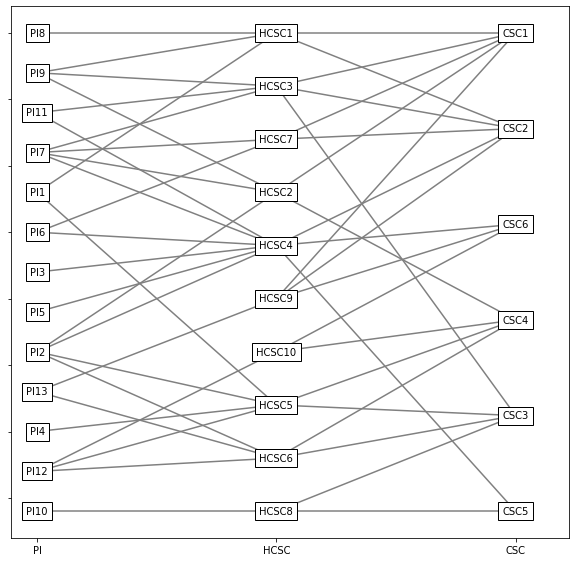

In [5]:
def greedy_placement(labels, positions, links):
    all_links = links
    current_assignments = {label: pos for label, pos in zip(labels, positions)}

    best_assignments = current_assignments.copy()
    min_intersections = count_intersections(best_assignments, all_links)

    changed = True
    while changed:
        changed = False
        for i in range(len(labels)):
            for j in range(i+1, len(labels)):
                if positions[i][0] == positions[j][0]:  # same column
                    swapped = current_assignments.copy()
                    swapped[labels[i]], swapped[labels[j]] = swapped[labels[j]], swapped[labels[i]]

                    curr_intersections = count_intersections(swapped, all_links)
                    if curr_intersections < min_intersections:
                        best_assignments = swapped
                        min_intersections = curr_intersections
                        changed = True
        current_assignments = best_assignments.copy()

    return best_assignments

labels = labels_col1 + labels_col2 + labels_col3
positions = col1_posits + col2_posits + col3_posits
all_links = links_col1_col2 + links_col2_col3

assignments = greedy_placement(labels, positions, all_links)
print(assignments, count_intersections(assignments, all_links))
draw_labels_and_links(assignments, all_links)

# Labels on 3 columns can be permuted

{'PI1': (0, 60), 'PI2': (0, 45), 'PI3': (0, 135), 'PI4': (0, 15), 'PI5': (0, 150), 'PI6': (0, 165), 'PI7': (0, 120), 'PI8': (0, 90), 'PI9': (0, 75), 'PI10': (0, 180), 'PI11': (0, 105), 'PI12': (0, 0), 'PI13': (0, 30), 'HCSC3': (90, 120), 'HCSC1': (90, 100), 'HCSC6': (90, 20), 'HCSC4': (90, 140), 'HCSC5': (90, 40), 'HCSC9': (90, 60), 'HCSC10': (90, 0), 'HCSC2': (90, 80), 'HCSC8': (90, 180), 'HCSC7': (90, 160), 'CSC1': (180, 108), 'CSC2': (180, 144), 'CSC3': (180, 72), 'CSC4': (180, 0), 'CSC5': (180, 180), 'CSC6': (180, 36)} 76


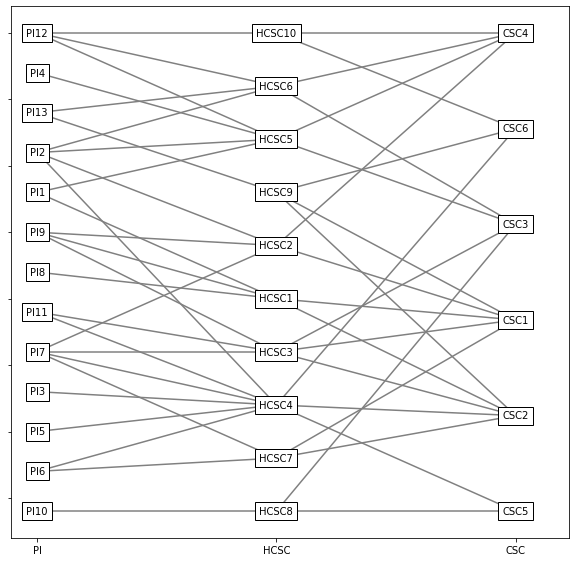

In [4]:
import math

def simulated_annealing(labels, positions, links, initial_temperature, cooling_rate, iteration):
    def energy(assignments):
        return count_intersections(assignments, links)
    
    def perturb(current_assignments, labels, positions):
        new_assignments = current_assignments.copy()
        idx1, idx2 = random.sample(range(len(labels)), 2)
        while positions[idx1][0] != positions[idx2][0]:  # Ensure they are in the same column
            idx1, idx2 = random.sample(range(len(labels)), 2)
        new_assignments[labels[idx1]], new_assignments[labels[idx2]] = new_assignments[labels[idx2]], new_assignments[labels[idx1]]
        return new_assignments
    
    current_assignments = {label: pos for label, pos in zip(labels, positions)}
    current_energy = energy(current_assignments)
    temperature = initial_temperature
    
    for i in range(iteration):
        new_assignments = perturb(current_assignments, labels, positions)
        new_energy = energy(new_assignments)
        
        if new_energy < current_energy or math.exp((current_energy - new_energy) / temperature) > random.random():
            current_assignments = new_assignments
            current_energy = new_energy
        
        temperature *= cooling_rate
    
    return current_assignments

# Parameters for simulated annealing
initial_temperature = 1000
cooling_rate = 0.995
iteration = 10000

assignments_sa = simulated_annealing(labels, positions, all_links, initial_temperature, cooling_rate, iteration)
print(assignments_sa, count_intersections(assignments_sa, all_links))
draw_labels_and_links(assignments_sa, all_links)

{'PI1': (0, 60), 'PI2': (0, 90), 'PI3': (0, 150), 'PI4': (0, 0), 'PI5': (0, 165), 'PI6': (0, 180), 'PI7': (0, 120), 'PI8': (0, 75), 'PI9': (0, 105), 'PI10': (0, 30), 'PI11': (0, 135), 'PI12': (0, 15), 'PI13': (0, 45), 'HCSC1': (90, 100), 'HCSC2': (90, 120), 'HCSC3': (90, 140), 'HCSC4': (90, 160), 'HCSC5': (90, 20), 'HCSC6': (90, 40), 'HCSC7': (90, 180), 'HCSC8': (90, 60), 'HCSC9': (90, 80), 'HCSC10': (90, 0), 'CSC1': (180, 144), 'CSC2': (180, 180), 'CSC3': (180, 36), 'CSC4': (180, 0), 'CSC5': (180, 108), 'CSC6': (180, 72)} 79


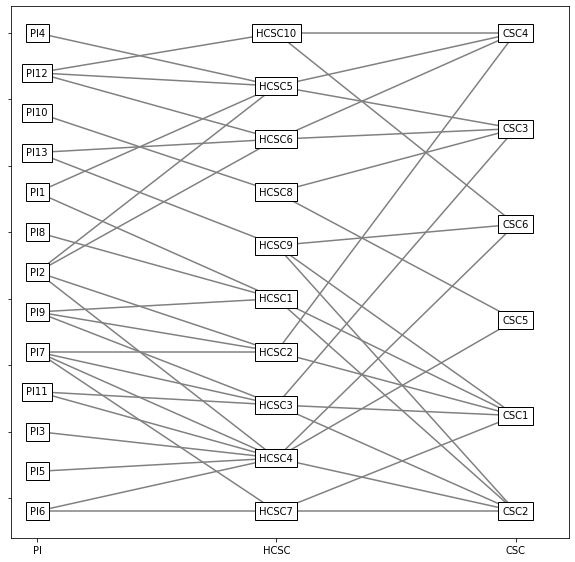

In [11]:
initial_temperature = 1000
cooling_rate = 0.995
iteration = 100000

assignments_sa = simulated_annealing(labels, positions, all_links, initial_temperature, cooling_rate, iteration)
print(assignments_sa, count_intersections(assignments_sa, all_links))
draw_labels_and_links(assignments_sa, all_links)

# Fixing the HCSC column, labels on the other 2 columns can be permuted

{'PI1': (0, 45), 'PI2': (0, 105), 'PI3': (0, 90), 'PI4': (0, 120), 'PI5': (0, 60), 'PI6': (0, 180), 'PI7': (0, 150), 'PI8': (0, 0), 'PI9': (0, 30), 'PI10': (0, 165), 'PI11': (0, 15), 'PI12': (0, 135), 'PI13': (0, 75), 'HCSC3': (90, 0), 'HCSC1': (90, 20), 'HCSC6': (90, 40), 'HCSC4': (90, 60), 'HCSC5': (90, 80), 'HCSC9': (90, 100), 'HCSC10': (90, 120), 'HCSC2': (90, 140), 'HCSC8': (90, 160), 'HCSC7': (90, 180), 'CSC1': (180, 72), 'CSC2': (180, 36), 'CSC3': (180, 0), 'CSC4': (180, 144), 'CSC5': (180, 180), 'CSC6': (180, 108)} 165


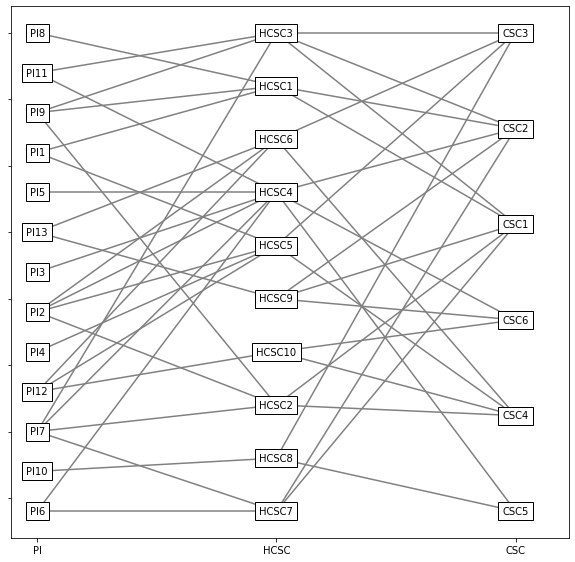

In [7]:
def greedy_placement(labels, positions, links):
    all_links = links
    current_assignments = {label: pos for label, pos in zip(labels, positions)}

    best_assignments = current_assignments.copy()
    min_intersections = count_intersections(best_assignments, all_links)

    changed = True
    while changed:
        changed = False
        for i in range(len(labels)):
            for j in range(i+1, len(labels)):
                if positions[i][0] == positions[j][0] and positions[i][0]!=90:  # same column
                    swapped = current_assignments.copy()
                    swapped[labels[i]], swapped[labels[j]] = swapped[labels[j]], swapped[labels[i]]

                    curr_intersections = count_intersections(swapped, all_links)
                    if curr_intersections < min_intersections:
                        best_assignments = swapped
                        min_intersections = curr_intersections
                        changed = True
        current_assignments = best_assignments.copy()

    return best_assignments

labels = labels_col1 + labels_col2 + labels_col3
positions = col1_posits + col2_posits + col3_posits
all_links = links_col1_col2 + links_col2_col3

assignments = greedy_placement(labels, positions, all_links)
print(assignments, count_intersections(assignments, all_links))
draw_labels_and_links(assignments, all_links)

{'PI1': (0, 60), 'PI2': (0, 105), 'PI3': (0, 90), 'PI4': (0, 165), 'PI5': (0, 45), 'PI6': (0, 150), 'PI7': (0, 135), 'PI8': (0, 30), 'PI9': (0, 15), 'PI10': (0, 180), 'PI11': (0, 0), 'PI12': (0, 120), 'PI13': (0, 75), 'HCSC3': (90, 0), 'HCSC1': (90, 20), 'HCSC6': (90, 40), 'HCSC4': (90, 60), 'HCSC5': (90, 80), 'HCSC9': (90, 100), 'HCSC10': (90, 120), 'HCSC2': (90, 140), 'HCSC8': (90, 160), 'HCSC7': (90, 180), 'CSC1': (180, 72), 'CSC2': (180, 36), 'CSC3': (180, 0), 'CSC4': (180, 144), 'CSC5': (180, 180), 'CSC6': (180, 108)} 165


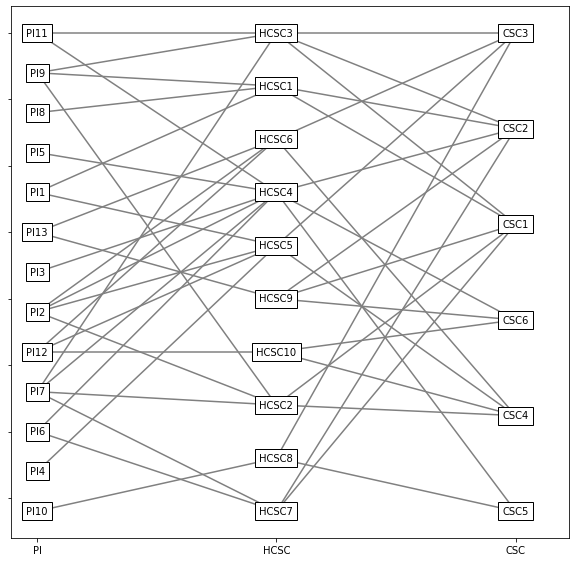

In [10]:
import math

def simulated_annealing(labels, positions, links, initial_temperature, cooling_rate, iteration):
    def energy(assignments):
        return count_intersections(assignments, links)
    
    def perturb(current_assignments, labels, positions):
        new_assignments = current_assignments.copy()
        idx1, idx2 = random.sample(range(len(labels)), 2)
        while positions[idx1][0] != positions[idx2][0] or positions[idx1][0] == 90 or positions[idx2][0] == 90:  # Ensure they are in the same column
            idx1, idx2 = random.sample(range(len(labels)), 2)
        new_assignments[labels[idx1]], new_assignments[labels[idx2]] = new_assignments[labels[idx2]], new_assignments[labels[idx1]]
        return new_assignments
    
    current_assignments = {label: pos for label, pos in zip(labels, positions)}
    current_energy = energy(current_assignments)
    temperature = initial_temperature
    
    for i in range(iteration):
        new_assignments = perturb(current_assignments, labels, positions)
        new_energy = energy(new_assignments)
        
        if new_energy < current_energy or math.exp((current_energy - new_energy) / temperature) > random.random():
            current_assignments = new_assignments
            current_energy = new_energy
        
        temperature *= cooling_rate
    
    return current_assignments

# Parameters for simulated annealing
initial_temperature = 1000
cooling_rate = 0.995
iteration = 10000

assignments_sa = simulated_annealing(labels, positions, all_links, initial_temperature, cooling_rate, iteration)
print(assignments_sa, count_intersections(assignments_sa, all_links))
draw_labels_and_links(assignments_sa, all_links)

{'PI1': (0, 45), 'PI2': (0, 105), 'PI3': (0, 90), 'PI4': (0, 135), 'PI5': (0, 75), 'PI6': (0, 165), 'PI7': (0, 150), 'PI8': (0, 0), 'PI9': (0, 30), 'PI10': (0, 180), 'PI11': (0, 15), 'PI12': (0, 120), 'PI13': (0, 60), 'HCSC3': (90, 0), 'HCSC1': (90, 20), 'HCSC6': (90, 40), 'HCSC4': (90, 60), 'HCSC5': (90, 80), 'HCSC9': (90, 100), 'HCSC10': (90, 120), 'HCSC2': (90, 140), 'HCSC8': (90, 160), 'HCSC7': (90, 180), 'CSC1': (180, 108), 'CSC2': (180, 36), 'CSC3': (180, 0), 'CSC4': (180, 144), 'CSC5': (180, 180), 'CSC6': (180, 72)} 165


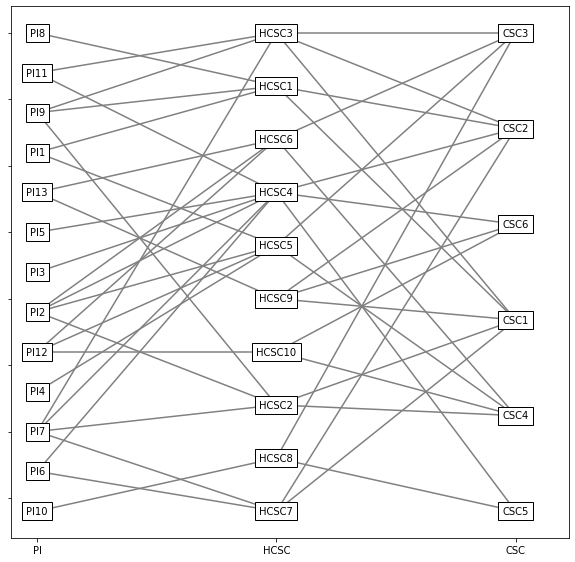

In [11]:
# Parameters for simulated annealing
initial_temperature = 1000
cooling_rate = 0.995
iteration = 30000

assignments_sa = simulated_annealing(labels, positions, all_links, initial_temperature, cooling_rate, iteration)
print(assignments_sa, count_intersections(assignments_sa, all_links))
draw_labels_and_links(assignments_sa, all_links)